In [2]:
import numpy as np
from simulation import run_simulation
import matplotlib.pyplot as plt
import pandas as pd
# TEST final experiments 
# neighborhood cc

# DEFAULT PARAMS
m = 0.5 # placeholder, not used. 
L = 30
time_steps = 200
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=.05
p_prop=0.1
min_seed=2
r_grow=0.8
tree_carrying_capacity = 50
neighborhood_carrying_capacity = tree_carrying_capacity*5
max_ignite=0.01
rand_seed = 1551

num_reps = 2
burnout_time = 100

rng = np.random.default_rng(rand_seed)

In [2]:


# Neighborhood CC 
# Run over a range of different ratios of tree_carrying_capacity/neighborhood_carrying_capacity
# from 1/10 to 1 (1/10, 1/9, 1/8, etc)

# set up data collection
# will have a couple of summary stats for each iteration

ratios = range(20)
num_trials = len(ratios) * num_reps
ratio = np.zeros(num_trials)
mean_biomass = np.zeros(num_trials)
median_biomass = np.zeros(num_trials)
max_biomass = np.zeros(num_trials)
min_biomass = np.zeros(num_trials)
std_biomass = np.zeros(num_trials)
mean_patch_count = np.zeros(num_trials)
mean_mean_patch_size = np.zeros(num_trials)
std_mean_patch_size = np.zeros(num_trials)
ln_num_avg_patch_int = np.zeros(num_trials)
ln_num_avg_patch_slope = np.zeros(num_trials)

# keep track of trial number
trial_counter = 0

for r in ratios: 
    r = r + 1
    n_cc = tree_carrying_capacity*r
    for rep in range(num_reps):
        print(trial_counter)
        results_dict = run_simulation(m=m, 
                L=L, 
                t_steps=time_steps, 
                d=d, 
                init_grass=init_grass, 
                init_tree=init_tree, 
                p_disp=p_disp, 
                p_prop=p_prop, 
                min_seed=min_seed, 
                r_grow=r_grow, 
                tree_carrying_capacity=tree_carrying_capacity,
                neighborhood_carrying_capacity=n_cc, 
                max_ignite=max_ignite,
                rng=rng)

        
        ratio[trial_counter] = r
        #### BIOMASS
        # calculate summary stats for that trial and record them
        biomass = results_dict['biomass'][burnout_time:]
        # mean (total biomass / L*L)
        mean_biomass[trial_counter] = np.mean(biomass/(L*L))
        # median (total biomass / L*L)
        median_biomass[trial_counter] = np.median(biomass/(L*L))
        # std (total biomass / L*L)
        std_biomass[trial_counter] = np.std(biomass/(L*L))
        # 
        max_biomass[trial_counter] = np.max(biomass/(L*L))
        min_biomass[trial_counter] = np.min(biomass/(L*L))
        
        #### PATCH SIZE
        num_patches = results_dict['num_patches'][burnout_time:]
        avg_patch_size = results_dict['avg_patch_size'][burnout_time:]
        med_patch_size = results_dict['med_patch_size'][burnout_time:]
        
        # Get indices that are not nan so stuff doesn't break
        finite_idx = ~np.isnan(avg_patch_size)
        # mean (num patches)
        mean_patch_count[trial_counter] = np.nanmean(num_patches)
        # mean of the means
        mean_mean_patch_size[trial_counter] = np.nanmean(avg_patch_size)
        # sd of means
        std_mean_patch_size[trial_counter] = np.nanstd(avg_patch_size)
        # slope and int of mean patch size vs num patches

        # try to get slope, intercept
        # return nan if doesn't work 
        try: 
            slope, intercept = np.polyfit(np.log(num_patches[finite_idx]), np.log(avg_patch_size[finite_idx]), 1)
            ln_num_avg_patch_int[trial_counter] = intercept
            ln_num_avg_patch_slope[trial_counter] = slope
        except: 
            ln_num_avg_patch_int[trial_counter] = np.nan
            ln_num_avg_patch_slope[trial_counter] = np.nan

        trial_counter += 1

0


c:\Users\helen\OneDrive\Documents\modeling_complex_systems\QERM497_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in true_divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]


1


c:\Users\helen\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


c:\Users\helen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [4]:
# Save it


df = pd.DataFrame({
    "ratio": ratio, 
    "mean_biomass": mean_biomass, 
    "median_biomass": median_biomass, 
    "max_biomass": max_biomass, 
    "min_biomass": min_biomass, 
    "std_biomass": std_biomass, 
    "mean_patch_count": mean_patch_count, 
    "mean_mean_patch_size": mean_mean_patch_size, 
    "std_mean_patch_size": std_mean_patch_size, 
    "ln_num_avg_patch_int": ln_num_avg_patch_int, 
    "ln_num_avg_patch_slope": ln_num_avg_patch_slope
})
df.to_csv("outputs/neighborcc_test.csv")

Make some plots. 

It looks like something interesting is happening around a ratio of 5. 

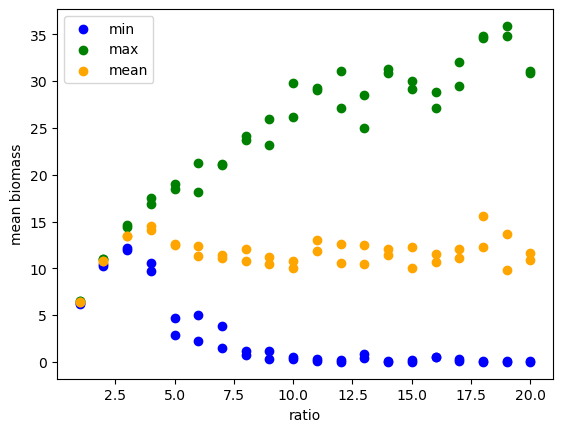

In [3]:


# Biomass: min, max, and mean. 
plt.figure()
plt.scatter(ratio, min_biomass, color = "blue", label = "min")
plt.scatter(ratio, max_biomass, color = "green", label = "max")
plt.scatter(ratio, mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("ratio")
plt.ylabel("mean biomass")
plt.show()

# patch size: 
# count, mean (of mean), std (of mean), slope & intercept of count vs mean


# Growth rate

In [11]:
growth_rates = np.linspace(0.001, 1., 20)
growth_rates

array([0.001     , 0.05357895, 0.10615789, 0.15873684, 0.21131579,
       0.26389474, 0.31647368, 0.36905263, 0.42163158, 0.47421053,
       0.52678947, 0.57936842, 0.63194737, 0.68452632, 0.73710526,
       0.78968421, 0.84226316, 0.89484211, 0.94742105, 1.        ])

In [12]:

# Choose one reasonable value of neighborhood CC ratio for all other experiments
# Choose 5. 
neighborhood_carrying_capacity = tree_carrying_capacity*5

# growth rate
# run from 0.01 to 1 (intervals of 0.05)
growth_rates = np.round(np.linspace(0.001, 1., 20),3)
num_trials = len(growth_rates) * num_reps
rate = np.zeros(num_trials)
mean_biomass = np.zeros(num_trials)
median_biomass = np.zeros(num_trials)
max_biomass = np.zeros(num_trials)
min_biomass = np.zeros(num_trials)
std_biomass = np.zeros(num_trials)
mean_patch_count = np.zeros(num_trials)
mean_mean_patch_size = np.zeros(num_trials)
std_mean_patch_size = np.zeros(num_trials)
ln_num_avg_patch_int = np.zeros(num_trials)
ln_num_avg_patch_slope = np.zeros(num_trials)

# keep track of trial number
trial_counter = 0

for r in growth_rates: 
    for rep in range(num_reps):
        print(trial_counter)
        results_dict = run_simulation(m=m, 
                L=L, 
                t_steps=time_steps, 
                d=d, 
                init_grass=init_grass, 
                init_tree=init_tree, 
                p_disp=p_disp, 
                p_prop=p_prop, 
                min_seed=min_seed, 
                r_grow=r, 
                tree_carrying_capacity=tree_carrying_capacity,
                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                max_ignite=max_ignite,
                rng=rng)

        
        rate[trial_counter] = r
        #### BIOMASS
        # calculate summary stats for that trial and record them
        biomass = results_dict['biomass'][burnout_time:]
        # mean (total biomass / L*L)
        mean_biomass[trial_counter] = np.mean(biomass/(L*L))
        # median (total biomass / L*L)
        median_biomass[trial_counter] = np.median(biomass/(L*L))
        # std (total biomass / L*L)
        std_biomass[trial_counter] = np.std(biomass/(L*L))
        # 
        max_biomass[trial_counter] = np.max(biomass/(L*L))
        min_biomass[trial_counter] = np.min(biomass/(L*L))
        
        #### PATCH SIZE
        num_patches = results_dict['num_patches'][burnout_time:]
        avg_patch_size = results_dict['avg_patch_size'][burnout_time:]
        med_patch_size = results_dict['med_patch_size'][burnout_time:]
        
        # Get indices that are not nan so stuff doesn't break
        finite_idx = ~np.isnan(avg_patch_size)
        # mean (num patches)
        mean_patch_count[trial_counter] = np.nanmean(num_patches)
        # mean of the means
        mean_mean_patch_size[trial_counter] = np.nanmean(avg_patch_size)
        # sd of means
        std_mean_patch_size[trial_counter] = np.nanstd(avg_patch_size)
        # slope and int of mean patch size vs num patches

        # try to get slope, intercept
        # return nan if doesn't work 
        try: 
            slope, intercept = np.polyfit(np.log(num_patches[finite_idx]), np.log(avg_patch_size[finite_idx]), 1)
            ln_num_avg_patch_int[trial_counter] = intercept
            ln_num_avg_patch_slope[trial_counter] = slope
        except: 
            ln_num_avg_patch_int[trial_counter] = np.nan
            ln_num_avg_patch_slope[trial_counter] = np.nan

        trial_counter += 1

0


c:\Users\helen\OneDrive\Documents\modeling_complex_systems\QERM497_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in true_divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]


1


c:\Users\helen\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [18]:
rate = np.repeat(growth_rates, num_reps)

In [19]:
df = pd.DataFrame({
    "growth_rate": rate, 
    "mean_biomass": mean_biomass, 
    "median_biomass": median_biomass, 
    "max_biomass": max_biomass, 
    "min_biomass": min_biomass, 
    "std_biomass": std_biomass, 
    "mean_patch_count": mean_patch_count, 
    "mean_mean_patch_size": mean_mean_patch_size, 
    "std_mean_patch_size": std_mean_patch_size, 
    "ln_num_avg_patch_int": ln_num_avg_patch_int, 
    "ln_num_avg_patch_slope": ln_num_avg_patch_slope
})
df.to_csv("outputs/growthrate_test.csv")

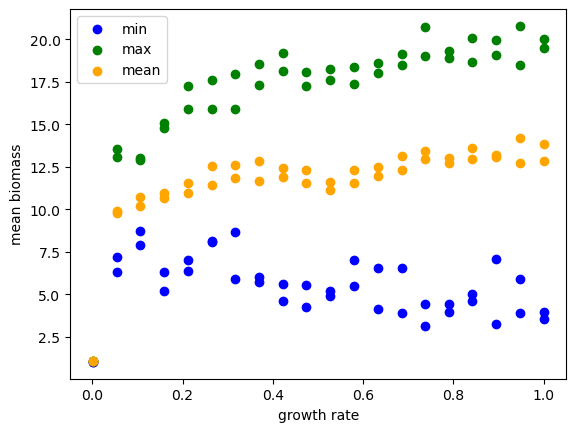

In [20]:

# Biomass: min, max, and mean. 
plt.figure()
plt.scatter(rate, min_biomass, color = "blue", label = "min")
plt.scatter(rate, max_biomass, color = "green", label = "max")
plt.scatter(rate, mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("growth rate")
plt.ylabel("mean biomass")
plt.show()

# patch size: 
# count, mean (of mean), std (of mean), slope & intercept of count vs mean
plt.figure()
plt.scatter(rate, min_biomass, color = "blue", label = "min")
plt.scatter(rate, max_biomass, color = "green", label = "max")
plt.scatter(rate, mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("growth rate")
plt.ylabel("mean biomass")
plt.show()

In [ ]:
# Animation of low vs high growth rate

# LOW Growth rate
import matplotlib.colors as colors
from simulation import initialize_forest, initialize_params_dict, grow_season, fire_season
#from viz import theme_colors
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
import ipympl
%matplotlib ipympl

theme_colors = {
    "green": "#017f66"
}

params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=time_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=0.01, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite, 
                                rng=rng)


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), layout="constrained")


forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree, 
                            rng=rng)
formatter = ScalarFormatter()
formatter.set_scientific(True)

im = ax[0].imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))
im.set_cmap('summer_r')
ax[1].set_title("Biomass")
ax[1].set_xlabel("timestep")
ax[1].get_yaxis().set_major_formatter(formatter)
ax[0].set_title("Forest")
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
t,biomass = [],[]

counter = 0

def animate_func(i):
    global forest, counter

    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)

    t.append(i)
    biomass.append(np.sum(forest))
    ax[1].plot(t, biomass, color = theme_colors['green']) 

    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))

    counter =+ 1
    return [ax]

anim = animation.FuncAnimation(
                            fig, 
                            animate_func, 
                            frames = 100000,
                            interval = 50, # in ms
)

In [6]:

# TREE carrying capacity

tree_carrying_capacity = np.linspace(50,1000, 20)
num_trials = len(tree_carrying_capacity) * num_reps

carrying_capacity = np.zeros(num_trials)
mean_biomass = np.zeros(num_trials)
median_biomass = np.zeros(num_trials)
max_biomass = np.zeros(num_trials)
min_biomass = np.zeros(num_trials)
std_biomass = np.zeros(num_trials)
mean_patch_count = np.zeros(num_trials)
mean_mean_patch_size = np.zeros(num_trials)
std_mean_patch_size = np.zeros(num_trials)
ln_num_avg_patch_int = np.zeros(num_trials)
ln_num_avg_patch_slope = np.zeros(num_trials)

# keep track of trial number
trial_counter = 0

for cc in tree_carrying_capacity: 
    n_cc = cc*5
    for rep in range(num_reps):
        print(trial_counter)
        results_dict = run_simulation(m=m, 
                L=L, 
                t_steps=time_steps, 
                d=d, 
                init_grass=init_grass, 
                init_tree=init_tree, 
                p_disp=p_disp, 
                p_prop=p_prop, 
                min_seed=min_seed, 
                r_grow=r_grow, 
                tree_carrying_capacity=cc,
                neighborhood_carrying_capacity=n_cc, 
                max_ignite=max_ignite,
                rng=rng)

        
        carrying_capacity[trial_counter] = cc
        #### BIOMASS
        # calculate summary stats for that trial and record them
        biomass = results_dict['biomass'][burnout_time:]
        # mean (total biomass / L*L)
        mean_biomass[trial_counter] = np.mean(biomass/(L*L))
        # median (total biomass / L*L)
        median_biomass[trial_counter] = np.median(biomass/(L*L))
        # std (total biomass / L*L)
        std_biomass[trial_counter] = np.std(biomass/(L*L))
        # 
        max_biomass[trial_counter] = np.max(biomass/(L*L))
        min_biomass[trial_counter] = np.min(biomass/(L*L))
        
        #### PATCH SIZE
        num_patches = results_dict['num_patches'][burnout_time:]
        avg_patch_size = results_dict['avg_patch_size'][burnout_time:]
        med_patch_size = results_dict['med_patch_size'][burnout_time:]
        
        # Get indices that are not nan so stuff doesn't break
        finite_idx = ~np.isnan(avg_patch_size)
        # mean (num patches)
        mean_patch_count[trial_counter] = np.nanmean(num_patches)
        # mean of the means
        mean_mean_patch_size[trial_counter] = np.nanmean(avg_patch_size)
        # sd of means
        std_mean_patch_size[trial_counter] = np.nanstd(avg_patch_size)
        # slope and int of mean patch size vs num patches

        # try to get slope, intercept
        # return nan if doesn't work 
        try: 
            slope, intercept = np.polyfit(np.log(num_patches[finite_idx]), np.log(avg_patch_size[finite_idx]), 1)
            ln_num_avg_patch_int[trial_counter] = intercept
            ln_num_avg_patch_slope[trial_counter] = slope
        except: 
            ln_num_avg_patch_int[trial_counter] = np.nan
            ln_num_avg_patch_slope[trial_counter] = np.nan

        trial_counter += 1


0


c:\Users\helen\OneDrive\Documents\modeling_complex_systems\QERM497_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in true_divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


c:\Users\helen\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [7]:
df = pd.DataFrame({
    "carring_capacity": carrying_capacity, 
    "mean_biomass": mean_biomass, 
    "median_biomass": median_biomass, 
    "max_biomass": max_biomass, 
    "min_biomass": min_biomass, 
    "std_biomass": std_biomass, 
    "mean_patch_count": mean_patch_count, 
    "mean_mean_patch_size": mean_mean_patch_size, 
    "std_mean_patch_size": std_mean_patch_size, 
    "ln_num_avg_patch_int": ln_num_avg_patch_int, 
    "ln_num_avg_patch_slope": ln_num_avg_patch_slope
})
df.to_csv("outputs/carrying_capacity_test.csv")

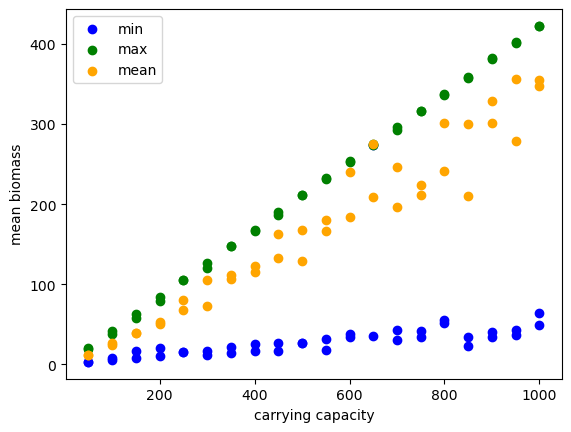

In [10]:
# Biomass: min, max, and mean. 
plt.figure()
plt.scatter(carrying_capacity, min_biomass, color = "blue", label = "min")
plt.scatter(carrying_capacity, max_biomass, color = "green", label = "max")
plt.scatter(carrying_capacity, mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("carrying capacity")
plt.ylabel("mean biomass")
plt.show()

In [11]:
0.000001*2**np.arange(20)

array([1.00000e-06, 2.00000e-06, 4.00000e-06, 8.00000e-06, 1.60000e-05,
       3.20000e-05, 6.40000e-05, 1.28000e-04, 2.56000e-04, 5.12000e-04,
       1.02400e-03, 2.04800e-03, 4.09600e-03, 8.19200e-03, 1.63840e-02,
       3.27680e-02, 6.55360e-02, 1.31072e-01, 2.62144e-01, 5.24288e-01])

In [14]:
num_reps

2

In [24]:
# ignition probability
# run from 0.000001 to 0.1 (double for each iteration)

probabilities = np.linspace(0, 1, 10)
neighborhood_carrying_capacity = 5*50
tree_carrying_capacity = 50
num_trials = len(probabilities) * num_reps

ignition_probability = np.zeros(num_trials)
mean_biomass = np.zeros(num_trials)
median_biomass = np.zeros(num_trials)
max_biomass = np.zeros(num_trials)
min_biomass = np.zeros(num_trials)
std_biomass = np.zeros(num_trials)
mean_patch_count = np.zeros(num_trials)
mean_mean_patch_size = np.zeros(num_trials)
std_mean_patch_size = np.zeros(num_trials)
ln_num_avg_patch_int = np.zeros(num_trials)
ln_num_avg_patch_slope = np.zeros(num_trials)

# keep track of trial number
trial_counter = 0

for p in probabilities: 
    for rep in range(num_reps):
        print(trial_counter)
        results_dict = run_simulation(m=m, 
                L=L, 
                t_steps=time_steps, 
                d=d, 
                init_grass=init_grass, 
                init_tree=init_tree, 
                p_disp=p_disp, 
                p_prop=p_prop, 
                min_seed=min_seed, 
                r_grow=r_grow, 
                tree_carrying_capacity=tree_carrying_capacity,
                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                max_ignite=p,
                rng=rng)

        
        ignition_probability[trial_counter] = p
        #### BIOMASS
        # calculate summary stats for that trial and record them
        biomass = results_dict['biomass'][burnout_time:]
        # mean (total biomass / L*L)
        mean_biomass[trial_counter] = np.mean(biomass/(L*L))
        # median (total biomass / L*L)
        median_biomass[trial_counter] = np.median(biomass/(L*L))
        # std (total biomass / L*L)
        std_biomass[trial_counter] = np.std(biomass/(L*L))
        # 
        max_biomass[trial_counter] = np.max(biomass/(L*L))
        min_biomass[trial_counter] = np.min(biomass/(L*L))
        
        #### PATCH SIZE
        num_patches = results_dict['num_patches'][burnout_time:]
        avg_patch_size = results_dict['avg_patch_size'][burnout_time:]
        med_patch_size = results_dict['med_patch_size'][burnout_time:]
        
        # Get indices that are not nan so stuff doesn't break
        finite_idx = ~np.isnan(avg_patch_size)
        # mean (num patches)
        mean_patch_count[trial_counter] = np.nanmean(num_patches)
        # mean of the means
        mean_mean_patch_size[trial_counter] = np.nanmean(avg_patch_size)
        # sd of means
        std_mean_patch_size[trial_counter] = np.nanstd(avg_patch_size)
        # slope and int of mean patch size vs num patches

        # try to get slope, intercept
        # return nan if doesn't work 
        try: 
            slope, intercept = np.polyfit(np.log(num_patches[finite_idx]), np.log(avg_patch_size[finite_idx]), 1)
            ln_num_avg_patch_int[trial_counter] = intercept
            ln_num_avg_patch_slope[trial_counter] = slope
        except: 
            ln_num_avg_patch_int[trial_counter] = np.nan
            ln_num_avg_patch_slope[trial_counter] = np.nan

        trial_counter += 1

0


c:\Users\helen\OneDrive\Documents\modeling_complex_systems\QERM497_FinalProject\simulation.py:162: RuntimeWarning: divide by zero encountered in true_divide
  ignition_probability = max_ignite / forest[d:-d, d:-d]
c:\Users\helen\anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


c:\Users\helen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\helen\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


19


In [25]:
df = pd.DataFrame({
    "ignition_probability": ignition_probability, 
    "mean_biomass": mean_biomass, 
    "median_biomass": median_biomass, 
    "max_biomass": max_biomass, 
    "min_biomass": min_biomass, 
    "std_biomass": std_biomass, 
    "mean_patch_count": mean_patch_count, 
    "mean_mean_patch_size": mean_mean_patch_size, 
    "std_mean_patch_size": std_mean_patch_size, 
    "ln_num_avg_patch_int": ln_num_avg_patch_int, 
    "ln_num_avg_patch_slope": ln_num_avg_patch_slope
})
df.to_csv("outputs/ignition_probability.csv")

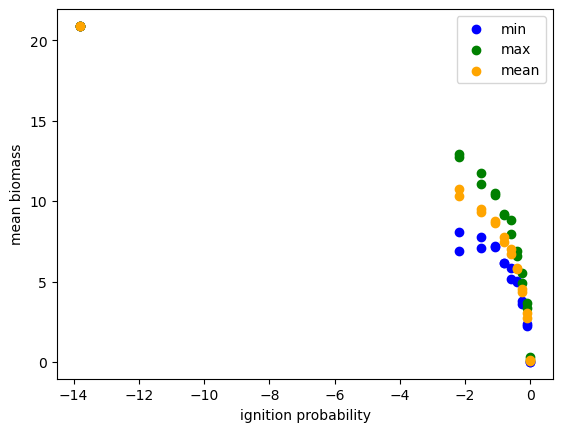

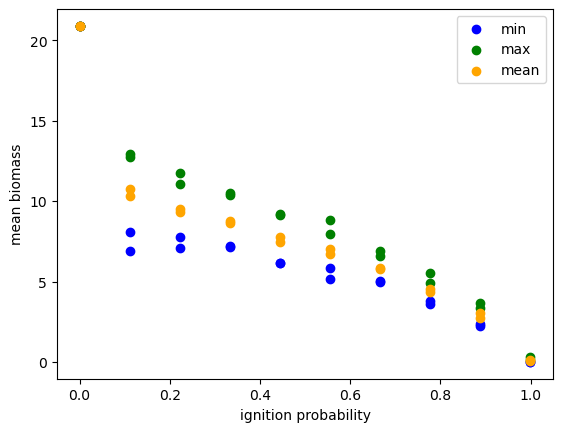

In [26]:
# Biomass: min, max, and mean. 
plt.figure()
plt.scatter(np.log(ignition_probability), min_biomass, color = "blue", label = "min")
plt.scatter(np.log(ignition_probability), max_biomass, color = "green", label = "max")
plt.scatter(np.log(ignition_probability), mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("ignition probability")
plt.ylabel("mean biomass")
plt.show()

# Biomass: min, max, and mean. 
plt.figure()
plt.scatter(ignition_probability, min_biomass, color = "blue", label = "min")
plt.scatter(ignition_probability, max_biomass, color = "green", label = "max")
plt.scatter(ignition_probability, mean_biomass, color = "orange", label = "mean")
plt.legend()
plt.xlabel("ignition probability")
plt.ylabel("mean biomass")
plt.show()